In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix

In [ ]:
file_path = "/content/drive/My Drive/spotifydata.csv"
songs = pd.read_csv(file_path)

In [ ]:
songs = songs.drop(['energy','valence','tempo','time_signature','key','instrumentalness'], axis=1)
songs.describe()

,danceability,acousticness,liveness,loudness,speechiness
count,6508.000000,6508.000000,6508.000000,6508.000000,6508.000000
mean,0.676338,0.390430,0.182856,-7.712206,0.103007
std,0.154312,0.275933,0.143080,3.058482,0.093262
min,0.079000,0.000033,0.004490,-30.939000,0.023000
25%,0.585000,0.145000,0.091500,-9.144500,0.041500
50%,0.702000,0.348000,0.127000,-7.336000,0.066200
75%,0.791250,0.613000,0.232000,-5.706000,0.131000
max,0.982000,0.993000,0.937000,1.094000,0.949000


In [ ]:
loudness = songs[['loudness']].values
scaler = MinMaxScaler()
loudness_scaled = scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)


In [ ]:
songs_features = songs.drop(['name', 'id'], axis=1)

In [ ]:
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

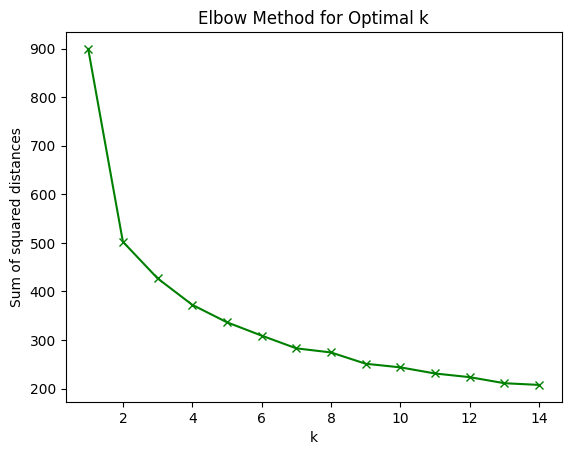

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
for n_clusters in range(2, 15):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    score = silhouette_score(songs_features, preds, metric='euclidean')
    print(f"For n_clusters = {n_clusters}, silhouette score is {score}")

For n_clusters = 2, silhouette score is 0.3881503026801195
For n_clusters = 3, silhouette score is 0.3370687983898216
For n_clusters = 4, silhouette score is 0.27417365516707287
For n_clusters = 5, silhouette score is 0.24691715371751904
For n_clusters = 6, silhouette score is 0.2426226750555298
For n_clusters = 7, silhouette score is 0.20921810418249534
For n_clusters = 8, silhouette score is 0.23188138611311143
For n_clusters = 9, silhouette score is 0.17921150498347965
For n_clusters = 10, silhouette score is 0.20788171270945227
For n_clusters = 11, silhouette score is 0.20738232931127534
For n_clusters = 12, silhouette score is 0.20844456583030974
For n_clusters = 13, silhouette score is 0.17212054561635787
For n_clusters = 14, silhouette score is 0.1832368233197871


array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>, <Axes: >]], dtype=object)

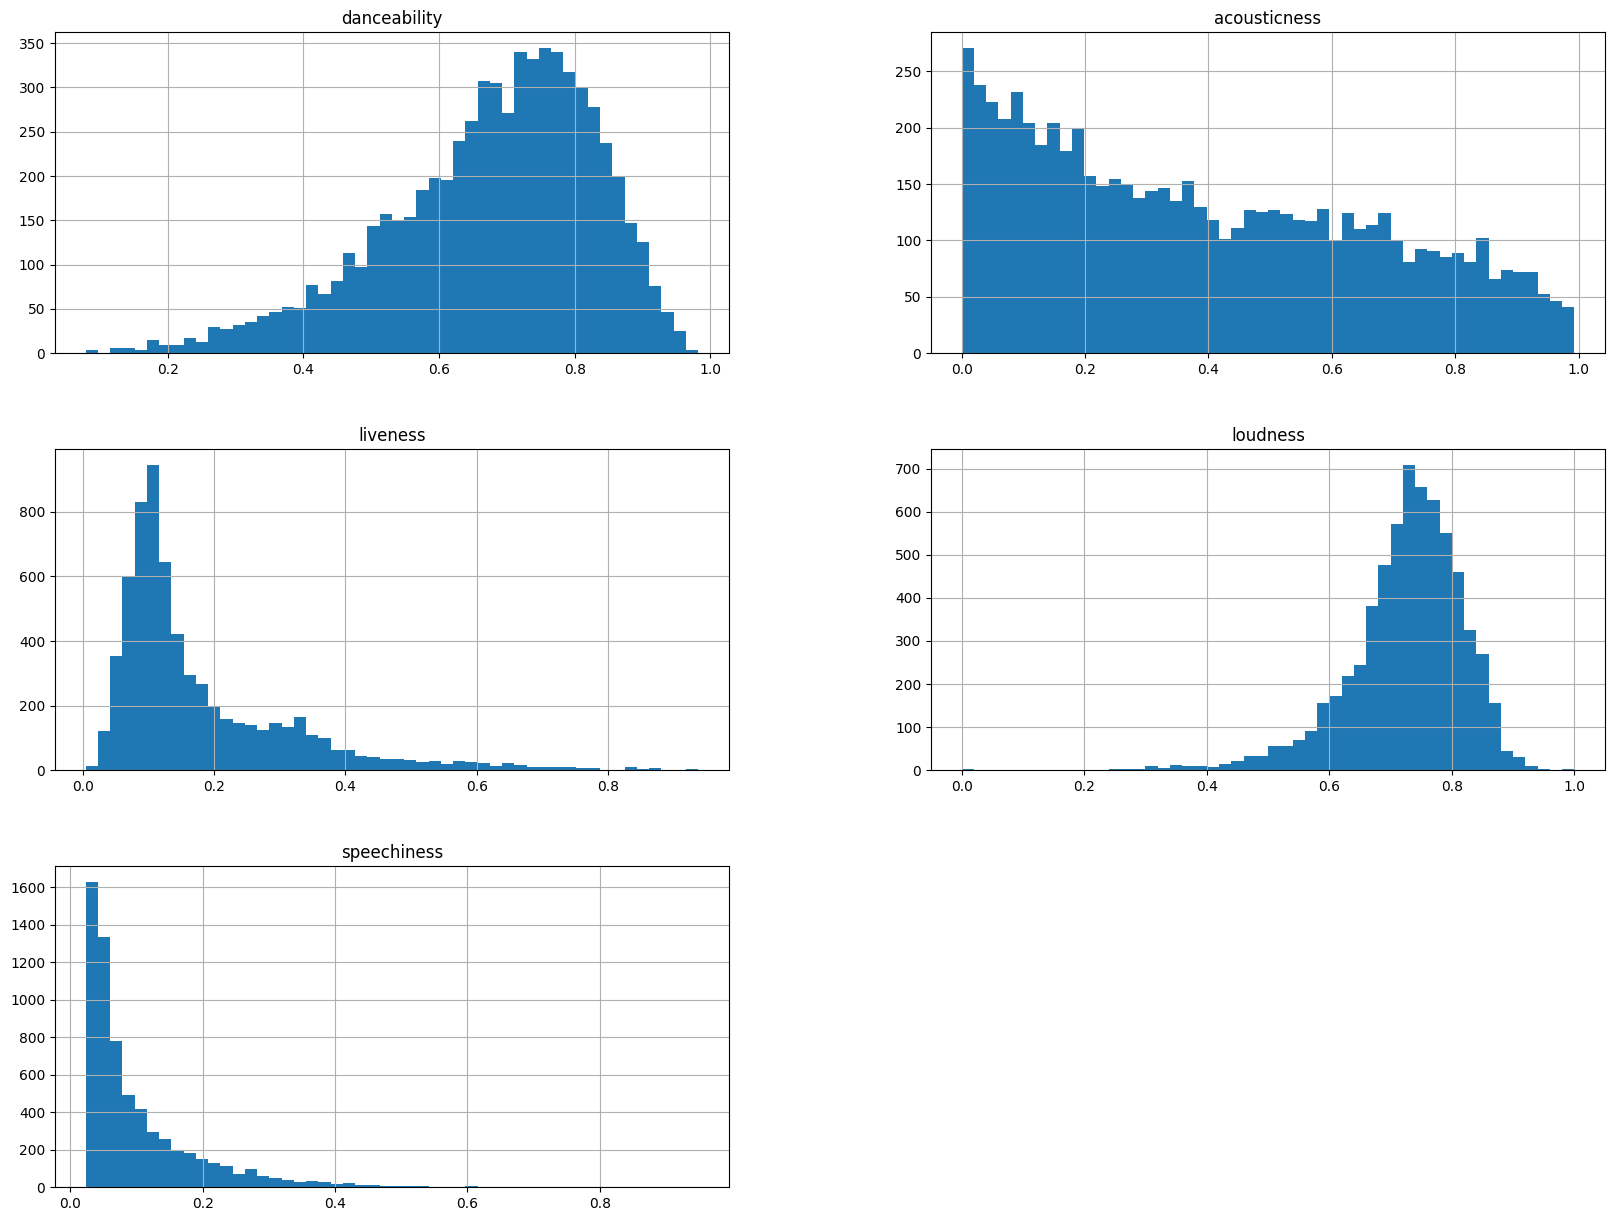

In [ ]:
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

songs.hist(bins=50,figsize=(20,15))

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)
y_kmeans = kmeans.predict(songs_features)


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)
pc = pd.DataFrame(principal_components, columns=['x', 'y'])
pc['label'] = y_kmeans

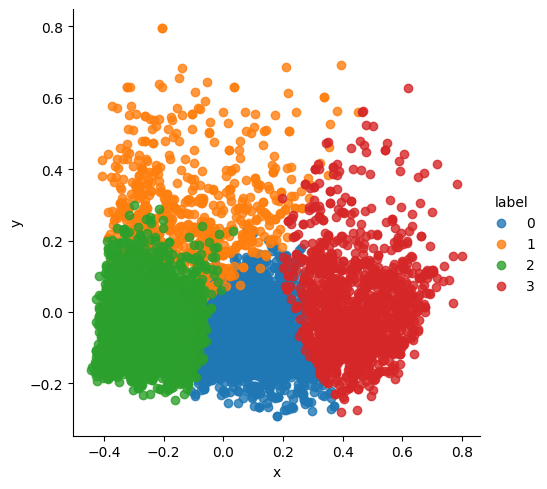

In [ ]:
sns.lmplot(data=pc, x='x', y='y', hue='label', fit_reg=False, legend=True)

In [ ]:
tsne = TSNE(n_components=2, perplexity=50)
tsne_components = tsne.fit_transform(songs_features)
ts = pd.DataFrame(tsne_components, columns=['x', 'y'])
ts['label'] = y_kmeans

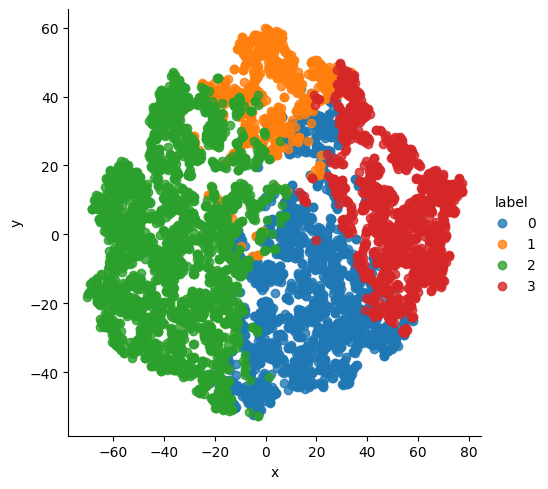

In [ ]:
sns.lmplot(data=ts, x='x', y='y', hue='label', fit_reg=False, legend=True)

In [ ]:
X = songs_features
y = y_kmeans
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title=title, ylabel='True label', xlabel='Predicted label')
    plt.show()

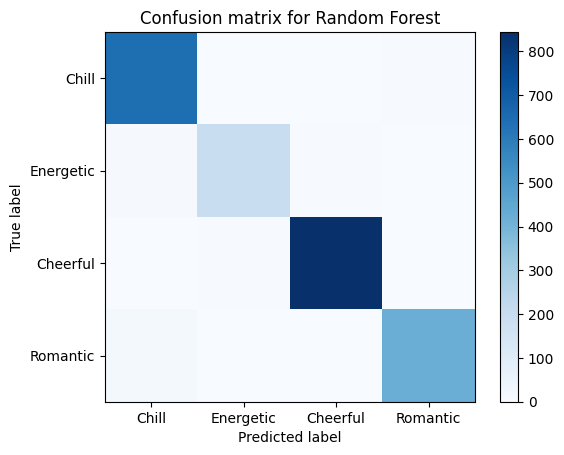

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=['Chill', 'Energetic', 'Cheerful', 'Romantic'], title='Confusion matrix for Random Forest')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

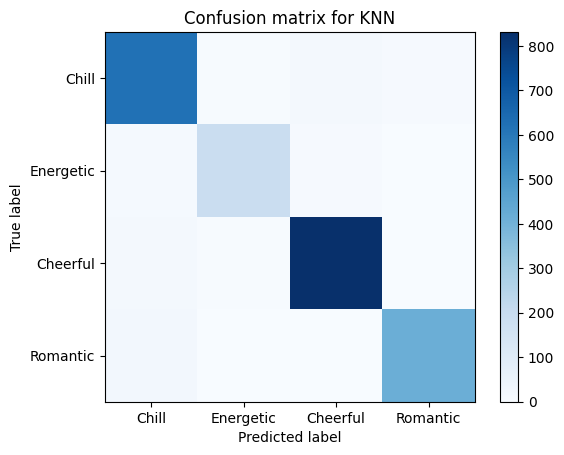

In [ ]:
plot_confusion_matrix(y_test, knn_pred, classes=['Chill', 'Energetic', 'Cheerful', 'Romantic'], title='Confusion matrix for KNN')


In [ ]:
svm_classifier = svm.SVC(kernel="linear")
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)


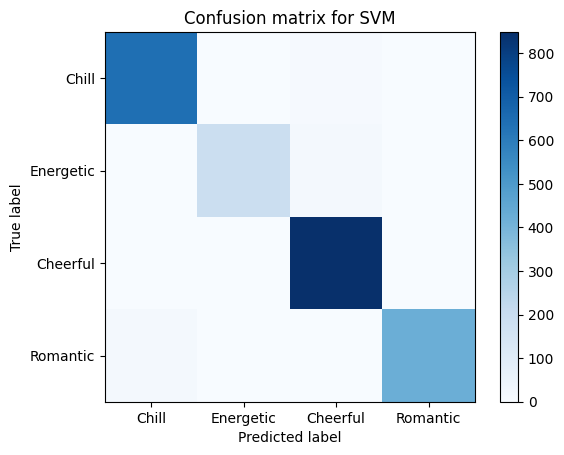

In [ ]:
plot_confusion_matrix(y_test, svm_pred, classes=['Chill', 'Energetic', 'Cheerful', 'Romantic'], title='Confusion matrix for SVM')


In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


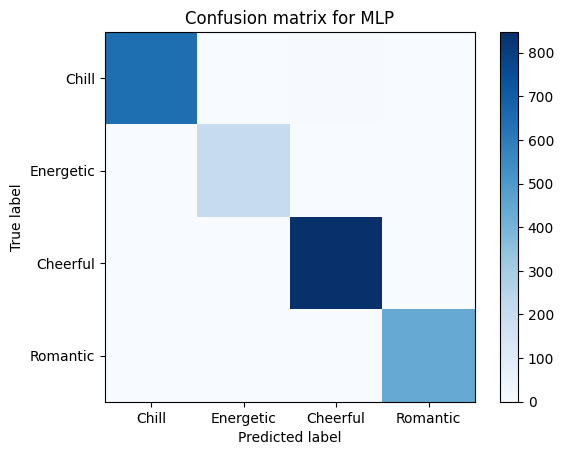

In [ ]:
plot_confusion_matrix(y_test, mlp_pred, classes=['Chill', 'Energetic', 'Cheerful', 'Romantic'], title='Confusion matrix for MLP')


In [ ]:
songs['label'] = y_kmeans
songs['label'] = songs['label'].replace([0, 1, 2, 3], ['Chill', 'Energetic', 'Cheerful', 'Romantic'])


In [ ]:
output_path = "/content/drive/My Drive/"
songs[songs['label'] == 'Chill'].to_csv(output_path + "cluster_Chill.csv", index=False)
songs[songs['label'] == 'Energetic'].to_csv(output_path + "cluster_Energetic.csv", index=False)
songs[songs['label'] == 'Cheerful'].to_csv(output_path + "cluster_Cheerful.csv", index=False)
songs[songs['label'] == 'Romantic'].to_csv(output_path + "cluster_Romantic.csv", index=False)

# Save overall classified data
songs.to_csv(output_path + "ClassifiedMusicData.csv", index=False)

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load your CSV file from Google Drive
input_file_path = '/content/drive/MyDrive/ClassifiedMusicData.csv'  # Update this path
df = pd.read_csv(input_file_path)

# Add the Spotify embed link to the 'id' column
df['id'] = 'https://open.spotify.com/embed/track/' + df['id']

# Save the updated DataFrame to a new CSV file
output_file_path = '/content/drive/MyDrive/Updated_ClassifiedMusicData.csv'  # Update this path
df.to_csv(output_file_path, index=False)

print("Updated CSV with Spotify embed links successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Updated CSV with Spotify embed links successfully!
